In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

df = pd.read_csv('alzheimers_disease_data.csv',delimiter=',')


df.drop(columns=['DoctorInCharge','Ethnicity'],inplace=True)
contengency = pd.crosstab(df['FamilyHistoryAlzheimers'],df['Diagnosis'])
chi2, p, _, _ = chi2_contingency(contengency)
print(f"Chi-square test p-value (Family History vs Diagnosis): {p}")


'''
print(df[['PhysicalActivity', 'Diagnosis', 'MMSE']].corr())
print(df[['DietQuality', 'Diagnosis', 'FunctionalAssessment']].corr())
print(df[['SleepQuality', 'Diagnosis', 'MMSE']].corr())
'''



Chi-square test p-value (Family History vs Diagnosis): 0.14069795394928386


"\nprint(df[['PhysicalActivity', 'Diagnosis', 'MMSE']].corr())\nprint(df[['DietQuality', 'Diagnosis', 'FunctionalAssessment']].corr())\nprint(df[['SleepQuality', 'Diagnosis', 'MMSE']].corr())\n"

In [12]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

df = pd.read_csv('alzheimers_disease_data.csv',delimiter=',')

df.drop(columns=['DoctorInCharge','Ethnicity'],inplace=True)

features = ['Age','Gender','EducationLevel','BMI','Smoking','AlcoholConsumption','PhysicalActivity','DietQuality','SleepQuality','FamilyHistoryAlzheimers','CardiovascularDisease','Diabetes','Depression','HeadInjury','Hypertension','SystolicBP','DiastolicBP','CholesterolTotal','CholesterolLDL','CholesterolHDL','CholesterolTriglycerides','MMSE','FunctionalAssessment','MemoryComplaints','BehavioralProblems','ADL','Confusion','Disorientation','PersonalityChanges','DifficultyCompletingTasks','Forgetfulness','Diagnosis']

df.dropna(subset=features + ['Diagnosis'], inplace=True)

x = df[features]
y= df['Diagnosis']

scaler = StandardScaler()
# Drop highly predictive columns and retrain
X_reduced = df.drop(columns=['Diagnosis', 'MMSE', 'ADL', 'FunctionalAssessment'])

x_scaled = scaler.fit_transform(X_reduced)


x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=42)
model = LogisticRegression()
model.fit(x_train,y_train)

y_pred = model.predict(x_test)

# Evaluate
print(classification_report(y_test, y_pred))



              precision    recall  f1-score   support

           0       0.76      0.86      0.80       277
           1       0.66      0.51      0.58       153

    accuracy                           0.73       430
   macro avg       0.71      0.68      0.69       430
weighted avg       0.72      0.73      0.72       430



In [15]:
X = df.drop(columns=['Diagnosis', 'MMSE', 'ADL', 'FunctionalAssessment'])

# Ensure model was trained on this X
model.fit(X, y)

# Now this will match
coeffs = model.coef_[0]

C:\Users\Gattupalli Saketh\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                      Feature  Coefficient    Impact
22           MemoryComplaints     0.024454  0.024454
9                SleepQuality    -0.022506  0.022506
23         BehavioralProblems     0.016078  0.016078
4                         BMI     0.010945  0.010945
6          AlcoholConsumption    -0.009229  0.009229
3              EducationLevel    -0.008412  0.008412
1                         Age    -0.008373  0.008373
10    FamilyHistoryAlzheimers    -0.002979  0.002979
15               Hypertension     0.002434  0.002434
12                   Diabetes    -0.002315  0.002315
11      CardiovascularDisease     0.002208  0.002208
2                      Gender    -0.002119  0.002119
20             CholesterolHDL     0.001776  0.001776
25             Disorientation    -0.001685  0.001685
24                  Confusion    -0.001513  0.001513
26         PersonalityChanges    -0.001457  0.001457
8                 DietQuality     0.001398  0.001398
16                 SystolicBP    -0.001346  0.

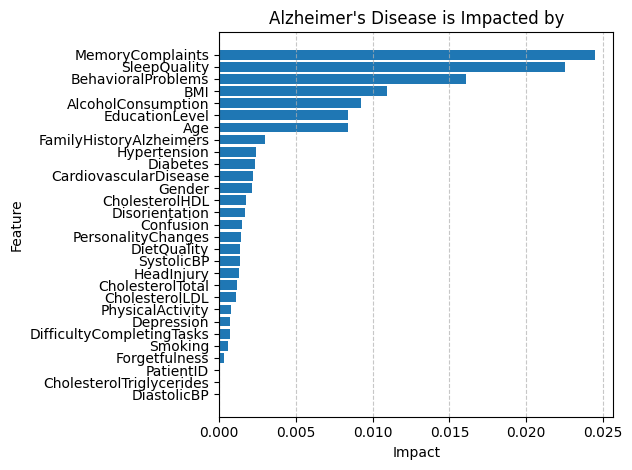

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

coeffs = model.coef_[0]
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': coeffs,
    'Impact': np.abs(coeffs)
}).sort_values(by='Impact', ascending=False)

print(feature_importance)

plt.barh(feature_importance['Feature'], feature_importance['Impact'])
plt.xlabel('Impact')
plt.ylabel('Feature')
plt.title("Alzheimer's Disease is Impacted by")
plt.gca().invert_yaxis()  # So the most important features appear at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()